In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers


df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1) # Entradas (química)
y = df['quality']              # Saída (nota)

# (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = tf.keras.Sequential([
    # Camada de Entrada + Primeira Camada Escondida (ReLU)
    layers.Dense(64, activation='relu', input_shape=(11,)),

    # (Dropout)
    layers.Dropout(0.2),

    # Segunda Camada Escondida (Tanh)
    layers.Dense(32, activation='tanh'),

    # Camada de Saída
    layers.Dense(1)
])

#(Backpropagation)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


# (Regularização)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 21.8803 - mae: 4.5087 - val_loss: 4.7678 - val_mae: 1.9221
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3607 - mae: 1.5451 - val_loss: 1.1016 - val_mae: 0.8547
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0609 - mae: 0.8223 - val_loss: 0.9654 - val_mae: 0.7937
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9642 - mae: 0.7852 - val_loss: 0.8576 - val_mae: 0.7452
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9000 - mae: 0.7553 - val_loss: 0.7837 - val_mae: 0.7140
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7763 - mae: 0.6907 - val_loss: 0.7206 - val_mae: 0.6853
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7285 - mae: 0.6691 - val_loss: 0.6672 - val_mae: 0.6586
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6874 - mae: 0.6487 - val_loss: 0.6179 - val_mae: 0.6334
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6655 - mae: 0

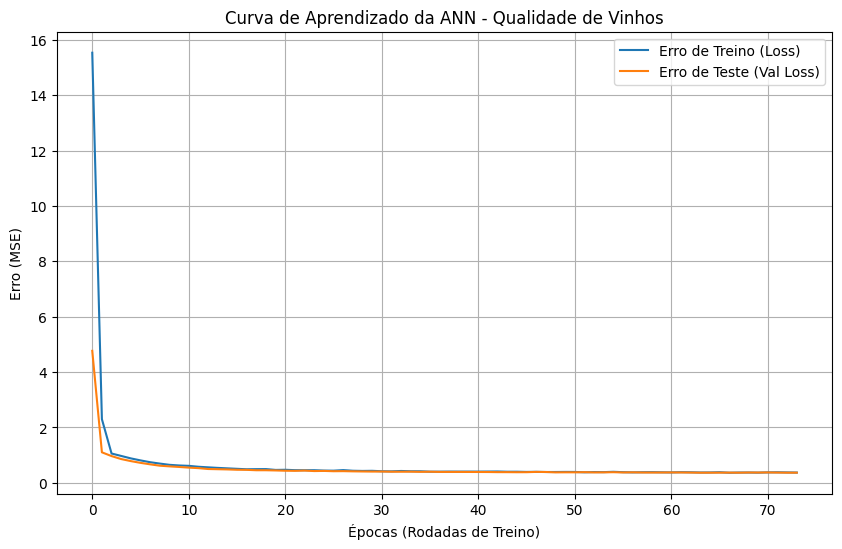

In [5]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


plt.plot(history.history['loss'], label='Erro de Treino (Loss)')
plt.plot(history.history['val_loss'], label='Erro de Teste (Val Loss)')


plt.title('Curva de Aprendizado da ANN - Qualidade de Vinhos')
plt.xlabel('Épocas (Rodadas de Treino)')
plt.ylabel('Erro (MSE)')
plt.legend()
plt.grid(True)


plt.show()